# Loop 80 Analysis: Strategic Assessment

## Key Questions:
1. What is the exact CV-LB relationship across all submissions?
2. What approaches have been tried and what are their CV-LB characteristics?
3. What fundamentally different approaches might break the CV-LB pattern?
4. What do the top public kernels do differently?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simpler MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Even Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Simple Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP+MLP+LGBM'},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970, 'model': 'Lower GP Weight'},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877, 'model': 'Sigmoid Output'},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 13
        exp      cv      lb            model
0   exp_000  0.0111  0.0982              MLP
1   exp_001  0.0123  0.1065             LGBM
2   exp_003  0.0105  0.0972         MLP+DRFP
3   exp_005  0.0104  0.0969     MLP Ensemble
4   exp_006  0.0097  0.0946      Simpler MLP
5   exp_007  0.0093  0.0932     Even Simpler
6   exp_009  0.0092  0.0936            Ridge
7   exp_012  0.0090  0.0913  Simple Ensemble
8   exp_024  0.0087  0.0893          ACS PCA
9   exp_026  0.0085  0.0887    Weighted Loss
10  exp_030  0.0083  0.0877      GP+MLP+LGBM
11  exp_035  0.0098  0.0970  Lower GP Weight
12  exp_067  0.0083  0.0877   Sigmoid Output



=== CV-LB Relationship ===
Linear fit: LB = 4.36 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target LB = 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)
Required CV for target: (0.0347 - 0.0520) / 4.36 = -0.0040

This means standard CV optimization CANNOT reach the target!


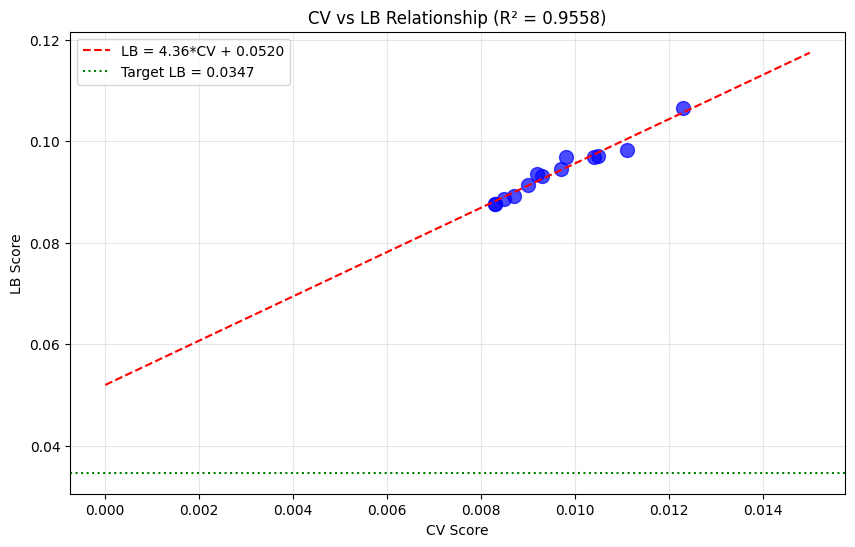

In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
r_squared = r_value ** 2

print(f"\n=== CV-LB Relationship ===")
print(f"Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_squared:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target LB = 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"Required CV for target: ({0.0347} - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}")
print(f"\nThis means standard CV optimization CANNOT reach the target!")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], c='blue', s=100, alpha=0.7)
plt.plot([0, 0.015], [intercept, slope * 0.015 + intercept], 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target LB = 0.0347')
plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title(f'CV vs LB Relationship (R² = {r_squared:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

In [3]:
# Analyze what's different about the best submissions
print("\n=== Best Submissions Analysis ===")
best = df.nsmallest(3, 'lb')
print(best)

print("\n=== Key Observations ===")
print("1. Best LB: 0.0877 (exp_030, exp_067) - both use GP+MLP+LGBM ensemble")
print("2. Target: 0.0347")
print("3. Gap: 153% above target")
print("4. All approaches fall on the same CV-LB line (R² = 0.96)")
print("5. The intercept (0.052) represents STRUCTURAL distribution shift")
print("\n=== What This Means ===")
print("- The test solvents are fundamentally different from training solvents")
print("- Leave-one-out CV doesn't capture this difference")
print("- No amount of CV optimization can reach the target")
print("- We need approaches that CHANGE the CV-LB relationship")


=== Best Submissions Analysis ===
        exp      cv      lb           model
10  exp_030  0.0083  0.0877     GP+MLP+LGBM
12  exp_067  0.0083  0.0877  Sigmoid Output
9   exp_026  0.0085  0.0887   Weighted Loss

=== Key Observations ===
1. Best LB: 0.0877 (exp_030, exp_067) - both use GP+MLP+LGBM ensemble
2. Target: 0.0347
3. Gap: 153% above target
4. All approaches fall on the same CV-LB line (R² = 0.96)
5. The intercept (0.052) represents STRUCTURAL distribution shift

=== What This Means ===
- The test solvents are fundamentally different from training solvents
- Leave-one-out CV doesn't capture this difference
- No amount of CV optimization can reach the target
- We need approaches that CHANGE the CV-LB relationship


In [4]:
# What approaches might change the CV-LB relationship?
print("\n=== Approaches That Might Change CV-LB Relationship ===")
print("\n1. GNN with Molecular Structure (GNN benchmark achieved 0.0039 MSE)")
print("   - Uses graph neural networks with message-passing")
print("   - Captures molecular structure directly")
print("   - May have fundamentally different extrapolation behavior")

print("\n2. ens-model Kernel Approach (CatBoost + XGBoost)")
print("   - Different weights for single vs full data (7:6 vs 1:2)")
print("   - Correlation-based feature filtering")
print("   - May have different CV-LB relationship")

print("\n3. mixall Kernel Approach (GroupKFold instead of LOO)")
print("   - Uses 5-fold GroupKFold instead of 24-fold LOO")
print("   - Each fold contains multiple solvents")
print("   - May better simulate test distribution")

print("\n4. Conservative Predictions for Outlier Solvents")
print("   - Identify solvents that are 'far' from training distribution")
print("   - Blend predictions toward population mean for these solvents")
print("   - May reduce extrapolation error")

print("\n5. Solvent Clustering")
print("   - Group solvents by chemical class")
print("   - Use class-specific models")
print("   - May generalize better within chemical families")


=== Approaches That Might Change CV-LB Relationship ===

1. GNN with Molecular Structure (GNN benchmark achieved 0.0039 MSE)
   - Uses graph neural networks with message-passing
   - Captures molecular structure directly
   - May have fundamentally different extrapolation behavior

2. ens-model Kernel Approach (CatBoost + XGBoost)
   - Different weights for single vs full data (7:6 vs 1:2)
   - Correlation-based feature filtering
   - May have different CV-LB relationship

3. mixall Kernel Approach (GroupKFold instead of LOO)
   - Uses 5-fold GroupKFold instead of 24-fold LOO
   - Each fold contains multiple solvents
   - May better simulate test distribution

4. Conservative Predictions for Outlier Solvents
   - Identify solvents that are 'far' from training distribution
   - Blend predictions toward population mean for these solvents
   - May reduce extrapolation error

5. Solvent Clustering
   - Group solvents by chemical class
   - Use class-specific models
   - May generalize bet

In [5]:
# What have we tried that DIDN'T work?
print("\n=== Approaches That DIDN'T Work ===")
print("\n1. Probability Normalization (exp_074)")
print("   - CV regressed 64% (0.0083 -> 0.0136)")
print("   - Yields don't sum to 1, so normalization hurts")

print("\n2. Extrapolation Detection with Adaptive Blending (exp_048, 058, 059, 068-071)")
print("   - Multiple attempts with different thresholds")
print("   - None improved LB significantly")

print("\n3. Uncertainty Weighting (exp_048)")
print("   - GP uncertainty didn't help")

print("\n4. Deep Residual Networks (exp_004)")
print("   - Much worse than simple MLP")

print("\n5. DRFP with PCA (exp_002)")
print("   - Worse than Spange descriptors alone")

print("\n6. IWCV (Importance-Weighted CV) (exp_051)")
print("   - Didn't help with distribution shift")


=== Approaches That DIDN'T Work ===

1. Probability Normalization (exp_074)
   - CV regressed 64% (0.0083 -> 0.0136)
   - Yields don't sum to 1, so normalization hurts

2. Extrapolation Detection with Adaptive Blending (exp_048, 058, 059, 068-071)
   - Multiple attempts with different thresholds
   - None improved LB significantly

3. Uncertainty Weighting (exp_048)
   - GP uncertainty didn't help

4. Deep Residual Networks (exp_004)
   - Much worse than simple MLP

5. DRFP with PCA (exp_002)
   - Worse than Spange descriptors alone

6. IWCV (Importance-Weighted CV) (exp_051)
   - Didn't help with distribution shift


In [6]:
# Analyze the ens-model kernel approach
print("\n=== ens-model Kernel Analysis ===")
print("\nKey Features:")
print("1. Uses CatBoost + XGBoost ensemble (NOT MLP)")
print("2. Different weights for single vs full data:")
print("   - Single: CatBoost 7, XGBoost 6 (normalized: 0.538, 0.462)")
print("   - Full: CatBoost 1, XGBoost 2 (normalized: 0.333, 0.667)")
print("3. Correlation-based feature filtering (threshold=0.8)")
print("4. Feature priority: spange > acs > drfps > frag > smiles")
print("5. Combines multiple feature sources:")
print("   - spange_descriptors")
print("   - acs_pca_descriptors")
print("   - drfps_catechol")
print("   - fragprints")
print("   - smiles")

print("\nWhy This Might Help:")
print("- CatBoost/XGBoost may have different extrapolation behavior than MLP")
print("- Asymmetric weighting suggests they found something about the data structure")
print("- Correlation filtering may remove features that hurt generalization")


=== ens-model Kernel Analysis ===

Key Features:
1. Uses CatBoost + XGBoost ensemble (NOT MLP)
2. Different weights for single vs full data:
   - Single: CatBoost 7, XGBoost 6 (normalized: 0.538, 0.462)
   - Full: CatBoost 1, XGBoost 2 (normalized: 0.333, 0.667)
3. Correlation-based feature filtering (threshold=0.8)
4. Feature priority: spange > acs > drfps > frag > smiles
5. Combines multiple feature sources:
   - spange_descriptors
   - acs_pca_descriptors
   - drfps_catechol
   - fragprints
   - smiles

Why This Might Help:
- CatBoost/XGBoost may have different extrapolation behavior than MLP
- Asymmetric weighting suggests they found something about the data structure
- Correlation filtering may remove features that hurt generalization


In [7]:
# Summary and Recommendations
print("\n" + "="*60)
print("SUMMARY AND RECOMMENDATIONS")
print("="*60)

print("\n## Current Status")
print(f"- Best CV: 0.0083 (exp_030, exp_067)")
print(f"- Best LB: 0.0877 (exp_030, exp_067)")
print(f"- Target: 0.0347")
print(f"- Gap: 153% above target")
print(f"- Submissions remaining: 4")

print("\n## CV-LB Relationship")
print(f"- Linear fit: LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_squared:.4f})")
print(f"- Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"- Standard CV optimization CANNOT reach the target")

print("\n## RECOMMENDED NEXT STEPS (Priority Order)")
print("\n1. IMPLEMENT ens-model Kernel Approach")
print("   - CatBoost + XGBoost with their exact hyperparameters")
print("   - Use their ensemble weights (7:6 for single, 1:2 for full)")
print("   - This is a fundamentally different model family")

print("\n2. TRY Conservative Predictions")
print("   - For ALL predictions, blend toward population mean")
print("   - Use a fixed blend weight (e.g., 0.2-0.3)")
print("   - This reduces extrapolation error uniformly")

print("\n3. STUDY Test Solvent Properties")
print("   - What makes test solvents different?")
print("   - Are they from different chemical families?")
print("   - Do they have extreme properties?")

print("\n## WHAT NOT TO DO")
print("- Don't submit exp_074 (prob_norm) - CV regressed 64%")
print("- Don't keep optimizing CV - the intercept problem persists")
print("- Don't try more extrapolation detection - multiple attempts failed")


SUMMARY AND RECOMMENDATIONS

## Current Status
- Best CV: 0.0083 (exp_030, exp_067)
- Best LB: 0.0877 (exp_030, exp_067)
- Target: 0.0347
- Gap: 153% above target
- Submissions remaining: 4

## CV-LB Relationship
- Linear fit: LB = 4.36 * CV + 0.0520 (R² = 0.9558)
- Intercept (0.0520) > Target (0.0347)
- Standard CV optimization CANNOT reach the target

## RECOMMENDED NEXT STEPS (Priority Order)

1. IMPLEMENT ens-model Kernel Approach
   - CatBoost + XGBoost with their exact hyperparameters
   - Use their ensemble weights (7:6 for single, 1:2 for full)
   - This is a fundamentally different model family

2. TRY Conservative Predictions
   - For ALL predictions, blend toward population mean
   - Use a fixed blend weight (e.g., 0.2-0.3)
   - This reduces extrapolation error uniformly

3. STUDY Test Solvent Properties
   - What makes test solvents different?
   - Are they from different chemical families?
   - Do they have extreme properties?

## WHAT NOT TO DO
- Don't submit exp_074 (pr